In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go
from scenario import*
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual

/var/folders/xl/w9r1w1ps1bscvq8ybsfntfqr0000gn/T/ipykernel_4362/1973112955.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:

# init commits
scenarios = []
def extract_scenarios_from_text_files(directory):
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            source_dir = os.path.join(root, dir)
            for file in os.listdir(source_dir):
                print(file)
                if file.endswith('.txt'):
                    file_path = os.path.join(source_dir, file)
                    try:
                        scenario = Scenario(file_path)
                        scenarios.append(scenario)
                    except Exception as e:
                        print(f"An error occurred while processing {file_path}: {e}")
                        continue
    return scenarios

def scenarios_to_dataframe(scenarios):
    data_dicts = [scenario.to_dict() for scenario in scenarios]
    return pd.DataFrame(data_dicts)

def plot_interactive(df):
    def update_plot(x, y):
        fig = px.scatter(df, x=x, y=y, title=f'{x} vs {y}', labels={x: x, y: y})
        fig.show()

    columns = df.columns
    interact(update_plot, x=columns, y=columns)

# Example usage
logs_directory = r'/Users/francesco/Library/CloudStorage/OneDrive-epfl.ch/MA2/Semester Project/DATA/WiFi_HaLow/data/coaxial'
scenarios = extract_scenarios_from_text_files(logs_directory)
data_frame = scenarios_to_dataframe(scenarios)
print(data_frame)

if not data_frame.empty:
    plot_interactive(data_frame)
else:
    print("No data available for plotting.")


results_60dBm_STA_1MHz
results_70dBm_STA_1MHz
results_50dBm_STA_2MHz
results_70dBm_STA_2MHz
results_50dBm_STA_1MHz
results_60dBm_STA_2MHz
results_60dBm_STA_1MHz
results_70dBm_STA_1MHz
results_50dBm_STA_2MHz
results_70dBm_STA_2MHz
results_50dBm_STA_1MHz
results_60dBm_STA_2MHz
coaxial_txpwr18_1Mhz_60dBm_combined.log
coaxial_txpwr2_1Mhz_60dBm_combined.log
coaxial_txpwr17_1Mhz_60dBm_combined.log
coaxial_txpwr6_1Mhz_60dBm_combined.log
coaxial_txpwr13_1Mhz_60dBm_combined.log
coaxial_txpwr9_1Mhz_60dBm_combined.log
coaxial_txpwr5_1Mhz_60dBm_combined.log
coaxial_txpwr10_1Mhz_60dBm_combined.log
coaxial_txpwr1_1Mhz_60dBm_combined.log
coaxial_txpwr14_1Mhz_60dBm_combined.log
coaxial_txpwr8_1Mhz_60dBm_combined.log
coaxial_txpwr12_1Mhz_60dBm_combined.log
coaxial_txpwr7_1Mhz_60dBm_combined.log
coaxial_txpwr16_1Mhz_60dBm_combined.log
coaxial_txpwr3_1Mhz_60dBm_combined.log
coaxial_txpwr19_1Mhz_60dBm_combined.log
coaxial_txpwr15_1Mhz_60dBm_combined.log
coaxial_txpwr0_1Mhz_60dBm_combined.log
coaxial_txpwr

interactive(children=(Dropdown(description='x', options=('Test Name', 'Timestamp', 'Test Type', 'Distance', 'A…

In [5]:
scenarios[0].to_dict()

{'Test Name': 'coaxial_txpwr13_1Mhz_60dBm_combined',
 'Timestamp': 'Sat 11 May 2024 07:00:49 AM CEST',
 'Test Type': 'coaxial',
 'Distance': 'null',
 'Attenuation (dBm)': 60,
 'Propagation': 'LoS',
 'Bandwidth': '1M',
 'Frequency': '8675',
 'MCS': 4,
 'Rate Control': 'on',
 'Guard Interval': 'long',
 'TX Gain': 13,
 'RX iPerf Bitrate (Mbits/sec)': 1.22,
 'TX iPerf Bitrate (Mbits/sec)': 1.25,
 'Receiver Lost/Total Datagrams': '0/2690',
 'Jitter (ms)': 13.495,
 'Receiver BER (%)': 0.0,
 'RSSI Median': -88.0,
 'SNR Median': 19.0,
 'Total Gain': -47}

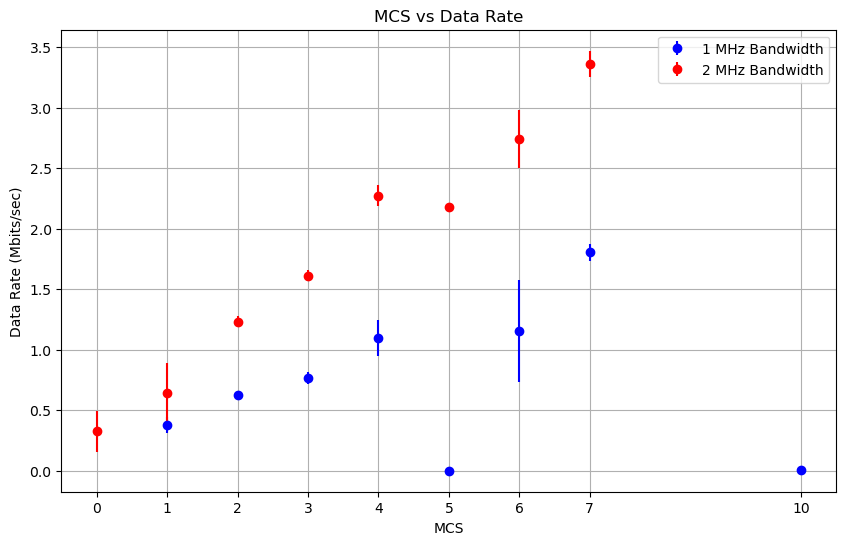

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Assuming scenarios is already populated
Scenario_coaxial_1MHz = []
Scenario_coaxial_2MHz = []

for scenario in scenarios:
    if scenario.bandwidth == "1M":
        Scenario_coaxial_1MHz.append(scenario)
    elif scenario.bandwidth == "2M":
        Scenario_coaxial_2MHz.append(scenario)

# Extract and group data by MCS
mcs_1m_data = defaultdict(list)
mcs_2m_data = defaultdict(list)

for scenario in Scenario_coaxial_1MHz:
    mcs_1m_data[scenario.mcs].append(scenario.rx_iperf_bitrate)

for scenario in Scenario_coaxial_2MHz:
    mcs_2m_data[scenario.mcs].append(scenario.rx_iperf_bitrate)

# Calculate mean and spread for 1M data
mcs_1m = []
mean_1m = []
spread_1m = []

for mcs, data_rates in mcs_1m_data.items():
    mcs_1m.append(mcs)
    mean_1m.append(np.mean(data_rates))
    spread_1m.append(np.std(data_rates))  # Using standard deviation as the spread

# Calculate mean and spread for 2M data
mcs_2m = []
mean_2m = []
spread_2m = []

for mcs, data_rates in mcs_2m_data.items():
    mcs_2m.append(mcs)
    mean_2m.append(np.mean(data_rates))
    spread_2m.append(np.std(data_rates))  # Using standard deviation as the spread
# Desired MCS order: start with 10, then 0 to 7 (excluding 8 and 9)
desired_order = [10] + list(range(8)) + list(range(11, max(max(mcs_1m, mcs_2m), 7) + 1))

# Sort the data according to the desired order
def sort_data_by_order(mcs, mean, spread, order):
    order_dict = {mcs_val: i for i, mcs_val in enumerate(order)}
    sorted_indices = sorted(range(len(mcs)), key=lambda i: order_dict[mcs[i]])
    return [mcs[i] for i in sorted_indices], [mean[i] for i in sorted_indices], [spread[i] for i in sorted_indices]

mcs_1m, mean_1m, spread_1m = sort_data_by_order(mcs_1m, mean_1m, spread_1m, desired_order)
mcs_2m, mean_2m, spread_2m = sort_data_by_order(mcs_2m, mean_2m, spread_2m, desired_order)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot 1MHz data with error bars
plt.errorbar(mcs_1m, mean_1m, yerr=spread_1m, fmt='o', color='blue', label='1 MHz Bandwidth')

# Plot 2MHz data with error bars
plt.errorbar(mcs_2m, mean_2m, yerr=spread_2m, fmt='o', color='red', label='2 MHz Bandwidth')

# Adding title and labels
plt.title('MCS vs Data Rate')
plt.xlabel('MCS')
plt.ylabel('Data Rate (Mbits/sec)')
plt.legend()
plt.grid(True)

# Ensure every MCS value in the desired order is displayed on the x-axis
plt.xticks(desired_order)

# Show the plot
plt.show()

